# Comparison of my custom $k$ nearest neighbors implementation and sklearn implementation

In [1]:
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from myknn import MyKNN
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_predict, validation_curve
from sklearn.metrics import classification_report

def plot_validation_curve(clf, X, y, param_name, param_range, cv=10):
    train_scores, test_scores = validation_curve(clf, X, y, param_name, param_range, cv=cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.figure(figsize=(8,5))
    plt.minorticks_on()
    plt.grid(which='both', axis='x', alpha=0.5)
    plt.xlabel('k')
    plt.ylabel('score')
    plt.plot(param_range, train_scores_mean, label='train')
    plt.plot(param_range, test_scores_mean, label='test')
    plt.legend(loc='best')
    k = param_range[np.argmax(test_scores_mean)]
    plt.axvline(x = k, alpha = 0.5, color = 'k')
    plt.show()
    print(f'first max test score for k = {k}')
    return k

## Iris dataset

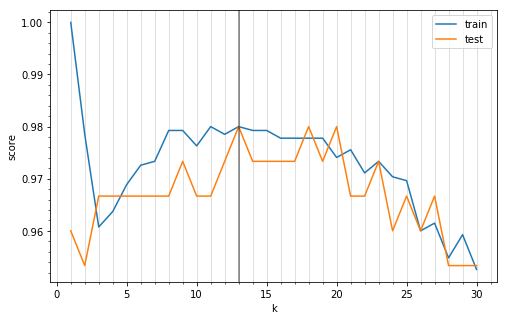

first max test score for k = 13


In [2]:
arff = loadarff('data/iris.arff')
df = pd.DataFrame(arff[0])

X = df.values[:,:-1]
y = df.values[:,-1]
y = list(map(lambda x: x.decode('utf-8'), y))
target_names = list(sorted(set(y)))

k = plot_validation_curve(KNeighborsClassifier(), X, y, 'n_neighbors', param_range=range(1, 31))

### scikit-learn KNeighborsClassifier

In [3]:
clf = KNeighborsClassifier(n_neighbors=k)
y_pred = cross_val_predict(clf, X, y, cv=10)
print(classification_report(y, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.96      0.97        50
 Iris-virginica       0.96      0.98      0.97        50

      micro avg       0.98      0.98      0.98       150
      macro avg       0.98      0.98      0.98       150
   weighted avg       0.98      0.98      0.98       150



### MyKNN

In [4]:
clf = MyKNN(k=k)
y_pred = cross_val_predict(clf, X, y, cv=10)
print(classification_report(y, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.96      0.97        50
 Iris-virginica       0.96      0.98      0.97        50

      micro avg       0.98      0.98      0.98       150
      macro avg       0.98      0.98      0.98       150
   weighted avg       0.98      0.98      0.98       150



## Diabetes dataset

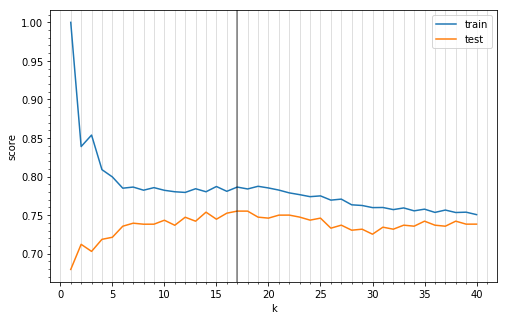

first max test score for k = 17


In [5]:
arff = loadarff('data/diabetes.arff')
df = pd.DataFrame(arff[0])

X = df.values[:,:-1]
y = df.values[:,-1]
y = list(map(lambda x: x.decode('utf-8'), y))
target_names = list(sorted(set(y)))

k = plot_validation_curve(KNeighborsClassifier(), X, y, 'n_neighbors', param_range=range(1, 41))

In [6]:
k = 16

### scikit-learn KNeighborsClassifier

In [7]:
clf = KNeighborsClassifier(n_neighbors=k)
y_pred = cross_val_predict(clf, X, y, cv=10)
print(classification_report(y, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

tested_negative       0.76      0.90      0.83       500
tested_positive       0.71      0.49      0.58       268

      micro avg       0.75      0.75      0.75       768
      macro avg       0.74      0.69      0.70       768
   weighted avg       0.75      0.75      0.74       768



### MyKNN

In [8]:
clf = MyKNN(k=k)
y_pred = cross_val_predict(clf, X, y, cv=10)
print(classification_report(y, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

tested_negative       0.78      0.87      0.82       500
tested_positive       0.69      0.54      0.61       268

      micro avg       0.76      0.76      0.76       768
      macro avg       0.73      0.71      0.72       768
   weighted avg       0.75      0.76      0.75       768



## Ionosphere dataset

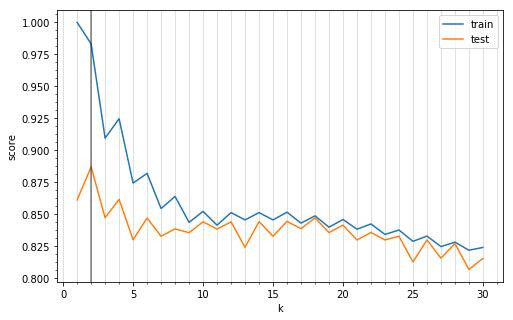

first max test score for k = 2


In [9]:
arff = loadarff('data/ionosphere.arff')
df = pd.DataFrame(arff[0])

X = df.values[:,:-1]
y = df.values[:,-1]
y = list(map(lambda x: x.decode('utf-8'), y))
target_names = list(sorted(set(y)))

k = plot_validation_curve(KNeighborsClassifier(), X, y, 'n_neighbors', param_range=range(1, 31), cv=10)

### scikit-learn KNeighborsClassifier

In [10]:
clf = KNeighborsClassifier(n_neighbors=k)
y_pred = cross_val_predict(clf, X, y, cv=10)
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           b       0.91      0.76      0.83       126
           g       0.88      0.96      0.91       225

   micro avg       0.89      0.89      0.89       351
   macro avg       0.89      0.86      0.87       351
weighted avg       0.89      0.89      0.88       351



### MyKNN

In [11]:
clf = MyKNN(k=k)
y_pred = cross_val_predict(clf, X, y, cv=10)
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           b       0.94      0.61      0.74       126
           g       0.82      0.98      0.89       225

   micro avg       0.85      0.85      0.85       351
   macro avg       0.88      0.79      0.82       351
weighted avg       0.86      0.85      0.84       351

